<a href="https://colab.research.google.com/github/zhouchun0105/credit-card-churners/blob/main/SUBMIT_creditcard_churners_team1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task:
1. Finish this documentation before Tuesday meeting
2. Read the SUBMIT file's "Description of Data" to fully understand your feature.
3. Read the SUBMIT file's "Introduction" to fit your smaller question to the project's goal.
4. Before each chunk of code, write text of what outcome you try to achieve with this code.
5. At the end of your question, write text to answer your question, and how it help to answer the project goal's question.
6. Remember to label your graph and table (have headers etc.)
7. On Tuesday meeting, find places to improve and spot errors.

Note:
- Chun works for Overall Documentation and ML (optional)
- Ana works for Q2 and Q12 and ML (optional)

Please fill in the following:
-  Ann Lu is responsible for Question #
- Phyllis is responsible for Question #
- Zijing is responsible for Question #1,3,4,5,6,7,13,14
- Yuhan is responsible for Question #

Everyone should be responsible for 2-4 questions


# **Credit Card Customer Churn Analysis and Predictions**

Team 1, Afternoon Session

Ana Maharjan, Ann Lu, Chun Zhou, Phyllis Cao, Yuhan Wang, Zijing Wang

2021/08/26





# **Introduction**

A manager at the bank wants to know why customers stop their credit card services. Our goal is to perform churn rate analysis to spot the causes of churning and predict which customers will churn. This helps the bank reduce the cost of customer retention.

## **Following are a few questions that we aim to answer through our analysis**


1.	What is the overall churn rate of our customer?
2.	What is our user portrait like in terms of age, gender, educational level and income?
3.	What age group of customers has a higher tendency to churn?
4.	Which education category of customers has a higher tendency to churn?
5.	Which income category of customers has a higher tendency to churn?
6.	Which marriage type of customers has a higher tendency to churn?
7.	How does dependent count influence churn rate?
8.	Which card type of customers has a higher tendency to churn?
9.	How does credit limit affect churn rate?
10.	How does the number of contacts by sales representative in the past 12 month affect churn rate?
11.	How does time length as being our customer affect churn rate?
12.	How does the number of other existing service affect churn rate?
13.	How does transaction amount affect churn rate?
14.	How does revolving balance affect churn rate?




---


Explanation (to be deleted): 
Q11 refer to month on book column
Q12 refer to total relationship count column


---






## **Description of Data**

The data is about credit card customer, product and service. It has 21 features and 10128 rows. Customer demographic feature, customer card activity, credit card feature, and service feature are included. The detailed feature names and their explanations are shown below:



*CLIENTNUM*: Client number. Unique identifier for the customer holding the account

*Attrition_Flag*: customer activity variable - if the account is closed then 1 else 0

*Customer_Age*: Demographic variable - Customer's Age in Years

*Gender*: Demographic variable - M=Male, F=Female

*Dependent_count*: Demographic variable - Number of dependents

*Education_Level*: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

*Marital_Status*: Demographic variable - Married, Single, Divorced, Unknown

*Income_Category*: Demographic variable - Annual Income Category of the account holder (<  40𝐾,
40
K
,
 40K - 60K,  60𝐾−
60
K
−
 80K,  80𝐾−
80
K
−
 120K, > $120K, Unknown)

*Card_Category*: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

*Months_on_book*: Period of relationship with bank

*Total_Relationship_Count*: Total no. of products held by the customer

*Months_Inactive_12_mon*: No. of months inactive in the last 12 months

*Contacts_Count_12_mon*: No. of Contacts in the last 12 months

*Credit_Limit*: Credit Limit on the Credit Card

*Total_Revolving_Bal*: Total Revolving Balance on the Credit Card

*Avg_Open_To_Buy*: Open to Buy Credit Line (Average of last 12 months)

*Total_Amt_Chng_Q4_Q1*: Change in Transaction Amount (Q4 over Q1)

*Total_Trans_Amt*: Total Transaction Amount (Last 12 months)

*Total_Trans_Ct*: Total Transaction Count (Last 12 months)

*Total_Ct_Chng_Q4_Q1*: Change in Transaction Count (Q4 over Q1)

*Avg_Utilization_Ratio*: Average Card Utilization Ratio

In [2]:
from google.colab import auth
auth.authenticate_user()

### **Question 1: What is the overall churn rate of our customer?**

In [ ]:
%%bigquery --project=ba-775-summer-21
/* churn rate */
SELECT sum(CAST(Attrition_Flag = 'Attrited Customer'as int)) as closed_acctount, count(Attrition_Flag) as total_account, sum(CAST(Attrition_Flag = 'Attrited Customer'as int))/count(Attrition_Flag)*100 as Churn_rate
FROM `ba-775-summer-21.project1team1.bankchurners`
where Attrition_Flag is not null

,closed_acctount,total_account,Churn_rate
0,1627,10127,16.065962


### **Question 2: What is our user portrait like in terms of age, gender, educational level and income?**

### **Question 3: What age group of customers has a higher tendency to churn?**

In [ ]:
%%bigquery age_tendency --project=ba-775-summer-21
/* age group tendency */
SELECT sum(CAST(Attrition_Flag = 'Attrited Customer'as int)) as closed_account,count(*) as total_account,sum(CAST(Attrition_Flag = 'Attrited Customer'as int))/count(*)*100 as Churn_rate,
case
      WHEN Customer_Age <10 then '0-10'
      WHEN Customer_Age <20 then '10-20'
      WHEN Customer_Age <30 then '20-30'
      WHEN Customer_Age <40 then '30-40'
      WHEN Customer_Age <50 then '40-50'
      WHEN Customer_Age <60 then '50-60'
      WHEN Customer_Age <70 then '60-70'
      ELSE '70-80'
    End as Customer_Age
    
FROM `ba-775-summer-21.project1team1.bankchurners`
group by Customer_Age
order by Customer_Age

Divide the number of attrited customers by the total number of customers group by the age category to see what's the churn rate of each group

In [ ]:
age_tendency

,closed_account,total_account,Churn_rate,Customer_Age
0,17,195,8.717949,20-30
1,261,1841,14.177078,30-40
2,772,4561,16.926113,40-50
3,506,2998,16.877919,50-60
4,71,530,13.396226,60-70
5,0,2,0.000000,70-80


Create graphs to see the age tendency. We can see the 40-60 group have higher tendency to attrite.

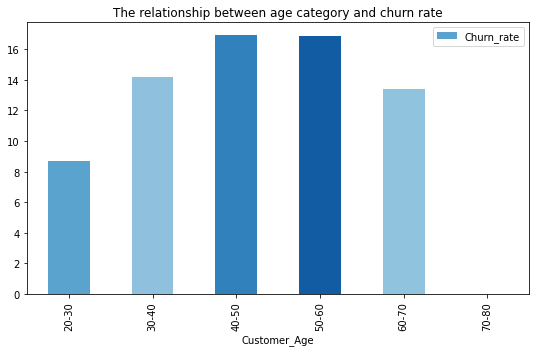

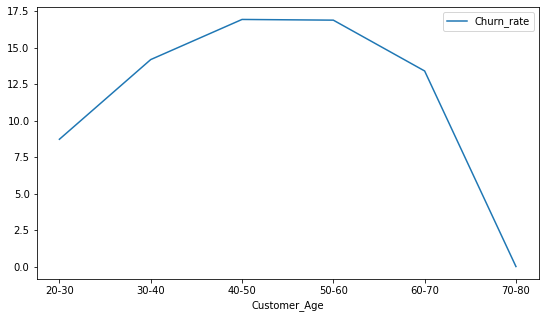

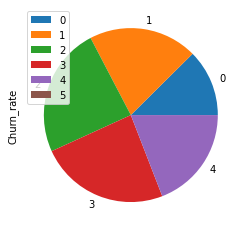

In [ ]:
age_tendency.plot(title = 'The relationship between age category and churn rate',kind='bar', x='Customer_Age', y='Churn_rate',color = ['#5ba3cf','#8fc1de','#3181bd','#125ca4','#8fc3de'], figsize=(9, 5));
age_tendency.plot(kind='line', x='Customer_Age', y='Churn_rate', figsize=(9, 5));
age_tendency.plot(kind='pie', x='Customer_Age', y='Churn_rate');

### **Question 4: Which education category of customers has a higher tendency to churn?**

In [ ]:
%%bigquery Education_Level --project=ba-775-summer-21
/*educational level tendency*/
Select Education_Level, count(*) as total_account, sum(CAST(Attrition_Flag = 'Attrited Customer'as int)) as closed_account,sum(CAST(Attrition_Flag = 'Attrited Customer'as int))/count(*)*100 as Churn_rate,
from `ba-775-summer-21.project1team1.bankchurners`
where Education_Level  not like 'Unknown'
group by Education_Level

Divide the number of attrited customers by the total number of customers group by the educational level to see what's the churn rate of each group

In [ ]:
Education_Level

,Education_Level,total_account,closed_account,Churn_rate
0,High School,2013,306,15.201192
1,Graduate,3128,487,15.569054
2,College,1013,154,15.202369
3,Doctorate,451,95,21.064302
4,Uneducated,1487,237,15.938130
5,Post-Graduate,516,92,17.829457


Create graphs to see education level tendency. We can see people with doctorate degree has highest tendency to attrite compare to other groups.

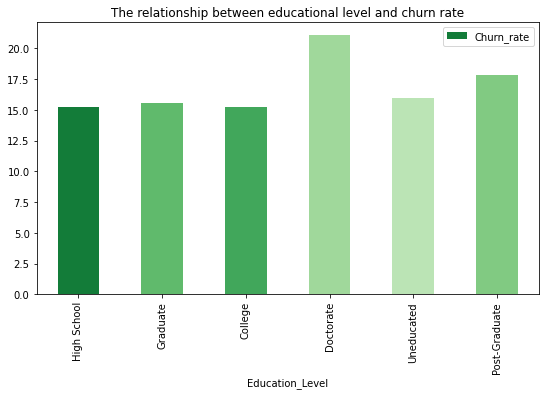

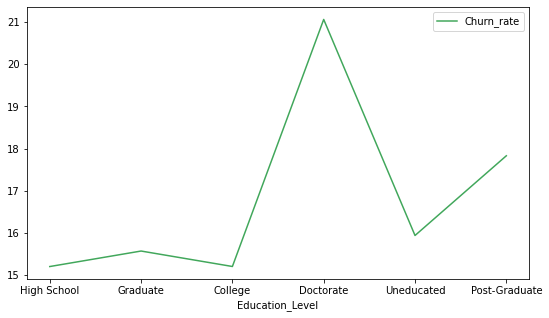

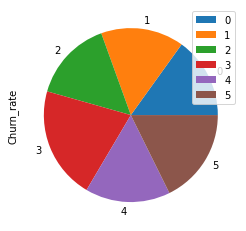

In [ ]:
Education_Level.plot(title = 'The relationship between educational level and churn rate',kind='bar', x='Education_Level', y='Churn_rate',color = ['#137c39','#60ba6c','#41a75b','#a0d89b','#bbe4b5','#81ca82'], figsize=(9, 5));
Education_Level.plot(kind='line', x='Education_Level', y='Churn_rate', color=['#41a75b'],figsize=(9, 5));
Education_Level.plot(kind='pie', x='Education_Level', y='Churn_rate');

### **Question 5: Which income category of customers has a higher tendency to churn?**

In [ ]:
%%bigquery Income_Category --project=ba-775-summer-21
/*income tendency*/
Select Income_Category, count(*) as total_account, sum(CAST(Attrition_Flag = 'Attrited Customer'as int)) as closed_account,sum(CAST(Attrition_Flag = 'Attrited Customer'as int))/count(*)*100 as Churn_rate,
from `ba-775-summer-21.project1team1.bankchurners`
where Income_Category  not like 'Unknown'
group by Income_Category
order by Income_Category

Divide the number of attrited customers by the total number of customers group by the income level to see what's the churn rate of each group

In [ ]:
Income_Category

,Income_Category,total_account,closed_account,Churn_rate
0,$120K +,727,126,17.331499
1,$40K - $60K,1790,271,15.139665
2,$60K - $80K,1402,189,13.480742
3,$80K - $120K,1535,242,15.765472
4,Less than $40K,3561,612,17.186184


Create graphs to see the income level tendency. We can see middle class income poeple($60k-80K) have lowest tendency to attrite. 

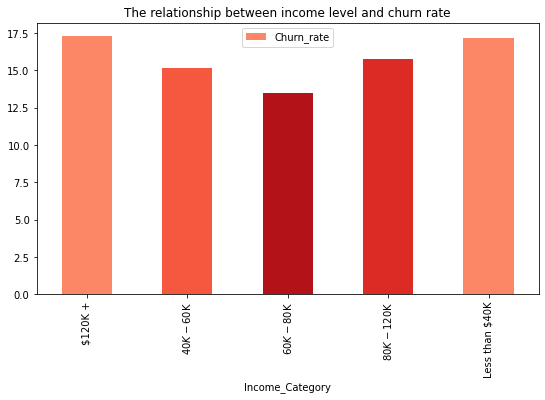

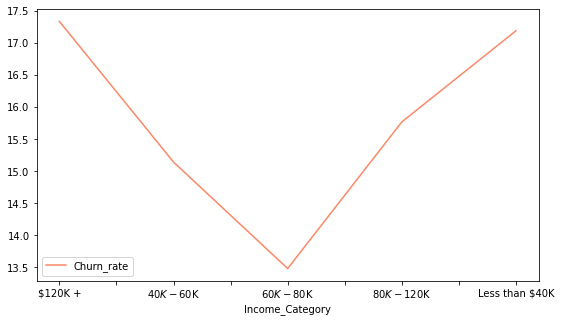

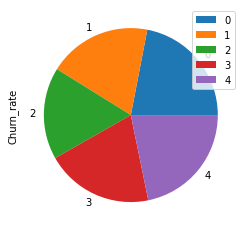

In [ ]:
Income_Category.plot(title = 'The relationship between income level and churn rate',kind='bar', x='Income_Category', y='Churn_rate',color = ['#fc8767', '#f6573f', '#b21218', '#dc2a25'], figsize=(9, 5));
Income_Category.plot(kind='line', x='Income_Category', y='Churn_rate', color=['#fc8767'],figsize=(9, 5));
Income_Category.plot(kind='pie', x='Income_Category', y='Churn_rate');

### **Question 6: Which marriage type of customers has a higher tendency to churn?**

In [ ]:
%%bigquery Marital_Status --project=ba-775-summer-21
/*marital status tendency*/
Select Marital_Status, count(*) as total_account, sum(CAST(Attrition_Flag = 'Attrited Customer'as int)) as closed_account,sum(CAST(Attrition_Flag = 'Attrited Customer'as int))/count(*)*100 as Churn_rate,
from `ba-775-summer-21.project1team1.bankchurners`
where Marital_Status not like 'Unknown'
group by Marital_Status
order by Marital_Status

Divide the number of attrited customers by the total number of customers group by the marital status to see what's the churn rate of each group

In [ ]:
Marital_Status

,Marital_Status,total_account,closed_account,Churn_rate
0,Divorced,748,121,16.176471
1,Married,4687,709,15.126947
2,Single,3943,668,16.941415


Create graphs to see the marital status tendency. We can see the divorced or single status people have higher tendency to attrite.

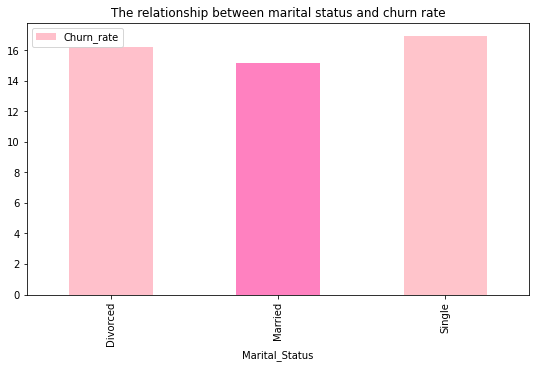

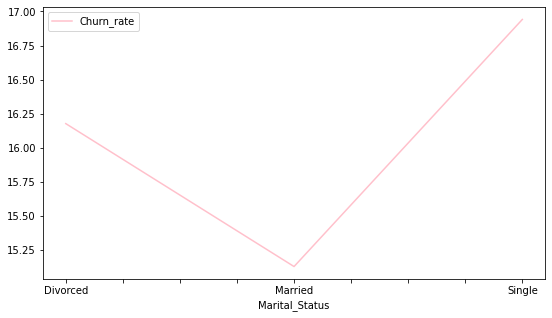

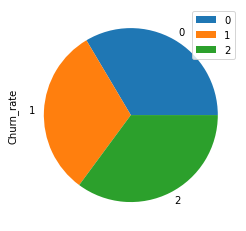

In [ ]:
Marital_Status.plot(title = 'The relationship between marital status and churn rate',kind='bar', x='Marital_Status', y='Churn_rate',color = ['#ffc0cb','#ff81c0','#ffc4cb'], figsize=(9, 5));
Marital_Status.plot(kind='line', x='Marital_Status', y='Churn_rate', color=['#ffc0cb'],figsize=(9, 5));
Marital_Status.plot(kind='pie', x='Marital_Status', y='Churn_rate');

### **Question 7: How does dependent count influence churn rate?**

In [ ]:
%%bigquery Dependent_count --project=ba-775-summer-21
/*dependent tendency*/
Select Dependent_count, count(*) as total_account, sum(CAST(Attrition_Flag = 'Attrited Customer'as int)) as closed_account,sum(CAST(Attrition_Flag = 'Attrited Customer'as int))/count(*)*100 as Churn_rate,
from `ba-775-summer-21.project1team1.bankchurners`
where Dependent_count is not null
group by Dependent_count
order by Dependent_count

Divide the number of attrited customers by the total number of customers group by the how many dependent they carry to see what's the churn rate of each group

In [ ]:
Dependent_count

,Dependent_count,total_account,closed_account,Churn_rate
0,0,904,135,14.933628
1,1,1838,269,14.635473
2,2,2655,417,15.706215
3,3,2732,482,17.642753
4,4,1574,260,16.518424
5,5,424,64,15.094340


Create graphs to see how amount of dependent peopel carry influence the tendency. We can see people with 3-4 dependent have higher tendency to attrite compare to other groups

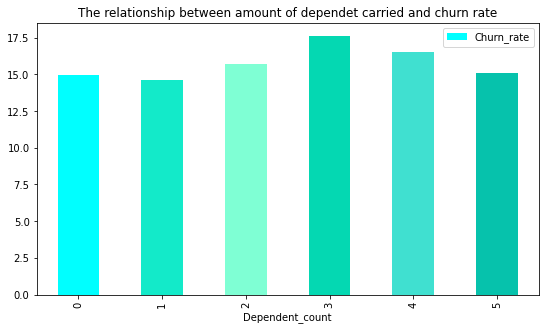

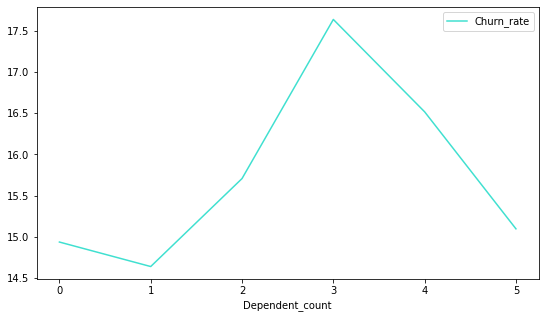

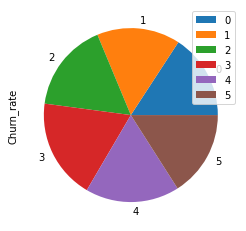

In [ ]:
Dependent_count.plot(title = 'The relationship between amount of dependet carried and churn rate',kind='bar', x='Dependent_count', y='Churn_rate',color = ['#00ffff','#13eac9','#7fffd4','#04d8b2','#40e0d0','#06c2ac'], figsize=(9, 5));
Dependent_count.plot(kind='line', x='Dependent_count', y='Churn_rate', color=['#40e0d0'],figsize=(9, 5));
Dependent_count.plot(kind='pie', x='Dependent_count', y='Churn_rate');

### **Question 8: Which card type of customers has a higher tendency to churn?**

In [ ]:
%%bigquery Card_impact --project=ba775-team-project
SELECT
Card_Category, 
COUNT(CLIENTNUM) AS Total_Customer,
SUM(CASE WHEN Attrition_Flag = "Attrited Customer" then 1 else 0 end) AS Churn_Customer,
SUM(CASE WHEN Attrition_Flag = "Attrited Customer" then 1 else 0 end)/COUNT(CLIENTNUM)*100 AS Churn_Rate
FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Card_Category
ORDER BY Total_Customer DESC

Divide the number of attrited customers by the total number of customers group by the card category to see what's the churn rate of each group.

In [ ]:
Card_impact

,Card_Category,Total_Customer,Churn_Customer,Churn_Rate
0,Blue,9436,1519,16.097923
1,Silver,555,82,14.774775
2,Gold,116,21,18.103448
3,Platinum,20,5,25.000000


Create graphs to see the tendency. We can see the customers who have blue card or platinum card are more likely to attrite.

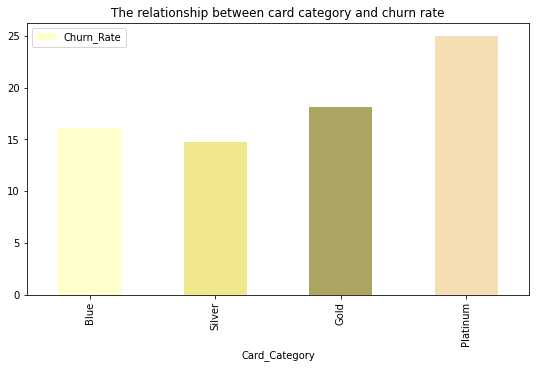

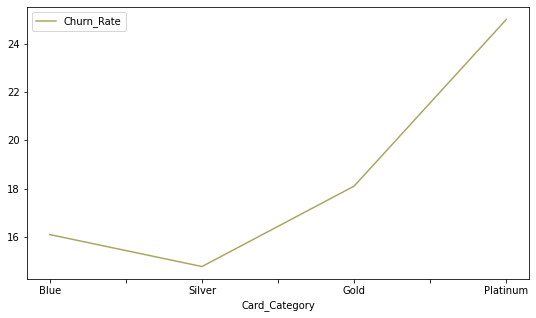

In [ ]:
Card_impact.plot(title = 'The relationship between card category and churn rate',kind='bar', x='Card_Category', y='Churn_Rate',color = ['#ffffcb','#f0e68c','#aaa662','#f5deb3'], figsize=(9, 5));
Card_impact.plot(kind='line', x='Card_Category', y='Churn_Rate', color=['#aaa662'],figsize=(9, 5));

In [ ]:
%%bigquery --project=ba775-team-project
SELECT ((SUM(cards * attrition_flag)-(SUM(cards) * SUM(attrition_flag)) / COUNT(*)))
  / (SQRT(SUM(cards * cards)-(SUM(cards) * SUM (cards)) / COUNT(*) ) * SQRT(SUM(attrition_flag * attrition_flag)
  -(SUM(attrition_flag) * SUM(attrition_flag)) / COUNT(*))) AS corr
from 
(
  select 
  CASE when card_category = 'Blue' then 1
       when card_category = 'Silver' then 2
       when card_category = 'Gold' then 3
       else 4 end as cards,    
  CAST(Attrition_Flag = 'Attrited Customer' AS INT) As attrition_flag
  from ba775-team-project.bankchurners.bankchurners
)

,corr
0,0.002354


When we assign each card category a value (assending as the category becomes more prestigious), the calculation below shows that there is no correlation between card category and whether the customer will churn.

### **Question 9: How does credit limit affect churn rate?**

In [ ]:
%%bigquery Credit_impact --project=ba775-team-project
SELECT
CASE
    WHEN Credit_Limit>=0 AND Credit_Limit <5000 THEN '0-5000'
    WHEN Credit_Limit>=5000 AND Credit_Limit <10000 THEN '05000-10000'
    WHEN Credit_Limit>=10000 AND Credit_Limit <15000 THEN '10000-15000'
    WHEN Credit_Limit>=15000 AND Credit_Limit <20000 THEN '15000-20000'
    WHEN Credit_Limit>=20000 AND Credit_Limit <25000 THEN '20000-25000'
    WHEN Credit_Limit>=25000 AND Credit_Limit <30000 THEN '25000-30000'
    WHEN Credit_Limit>=30000 AND Credit_Limit <35000 THEN '30000-35000'
  END AS Credit_Limit,
SUM(CAST(Attrition_Flag = 'Attrited Customer' AS INT)) AS Churn_Customer,
COUNT(*) AS Total_Customer,
SUM(CAST(Attrition_Flag = 'Attrited Customer' AS INT))/COUNT(*)*100 AS Churn_Rate

FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Credit_Limit
ORDER BY Credit_Limit

Divide the number of attrited customers by the total number of customers group by the Credit_Limit to see whether the credit limit will affect the churn rate.

In [ ]:
Credit_impact

,Credit_Limit,Churn_Customer,Total_Customer,Churn_Rate
0,0-5000,926,5358,17.282568
1,05000-10000,302,2015,14.987593
2,10000-15000,145,941,15.409139
3,15000-20000,70,549,12.750455
4,20000-25000,43,372,11.559140
5,25000-30000,33,225,14.666667
6,30000-35000,108,667,16.191904


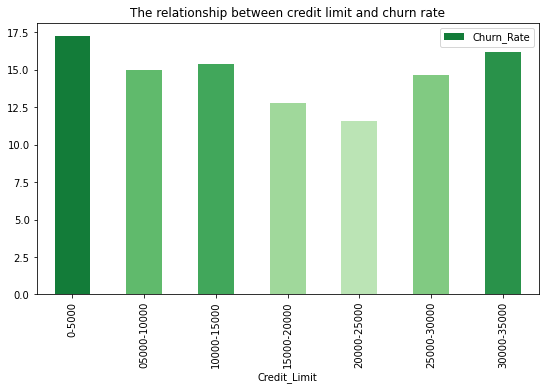

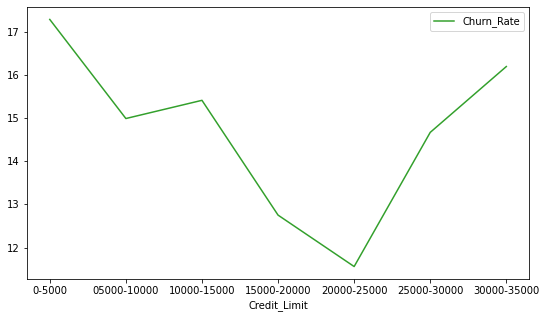

In [ ]:
Credit_impact.plot(title = 'The relationship between credit limit and churn rate', kind='bar', 
                   x='Credit_Limit', y='Churn_Rate', 
                   color = ['#137c39','#60ba6c','#41a75b','#a0d89b','#bbe4b5','#81ca82','#29924a'], figsize=(9, 5));
Credit_impact.plot(kind='line', x='Credit_Limit', y='Churn_Rate', color = '#33a02c', figsize=(9, 5));

Create graphs to see the tendency. We can see there is no significant relationship between credit limit and churn rate.

In [ ]:
%%bigquery --project=ba775-team-project
SELECT ((SUM(credit_limit * attrition_flag)-(SUM(credit_limit) * SUM(attrition_flag)) / COUNT(*)))
  / (SQRT(SUM(credit_limit * credit_limit)-(SUM(credit_limit) * SUM (credit_limit)) / COUNT(*) ) * SQRT(SUM(attrition_flag * attrition_flag)
  -(SUM(attrition_flag) * SUM(attrition_flag)) / COUNT(*))) AS corr
from 
(
  select 
  credit_limit,
  CAST(Attrition_Flag = 'Attrited Customer' AS INT) As attrition_flag
  from ba775-team-project.bankchurners.bankchurners
)

,corr
0,-0.023873


The calculation of correlation coefficient also shows that there is no significant relationship between credit limit and loss of customer.

### **Question 10: How does the number of contacts by sales representative in the past 12 month affect churn rate?**

In [ ]:
%%bigquery ContactNum_impact --project=ba775-team-project
SELECT 
CASE
  WHEN Contacts_Count_12_mon=0 THEN 'Month_0'
  WHEN Contacts_Count_12_mon=1 THEN 'Month_1'
  WHEN Contacts_Count_12_mon=2 THEN 'Month_2'
  WHEN Contacts_Count_12_mon=3 THEN 'Month_3'
  WHEN Contacts_Count_12_mon=4 THEN 'Month_4'
  WHEN Contacts_Count_12_mon=5 THEN 'Month_5'
  WHEN Contacts_Count_12_mon=6 THEN 'Month_6'
  END AS Contacts_Count_12_mon,
SUM(CAST(Attrition_flag='Attrited Customer' AS INT)) AS Churn_Customer,
COUNT(*) AS Total_Customer,
SUM(CAST(Attrition_flag='Attrited Customer' AS INT))/COUNT(*)*100 AS Churn_Rate
FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Contacts_Count_12_mon
ORDER BY Contacts_Count_12_mon

Divide the number of attrited customers by the total number of customers group by the Contacts_Count_12_mon to see whether the number of contacts in last 12 months will affect the churn rate.

In [ ]:
ContactNum_impact

,Contacts_Count_12_mon,Churn_Customer,Total_Customer,Churn_Rate
0,Month_0,7,399,1.754386
1,Month_1,108,1499,7.204803
2,Month_2,403,3227,12.488379
3,Month_3,681,3380,20.147929
4,Month_4,315,1392,22.629310
5,Month_5,59,176,33.522727
6,Month_6,54,54,100.000000


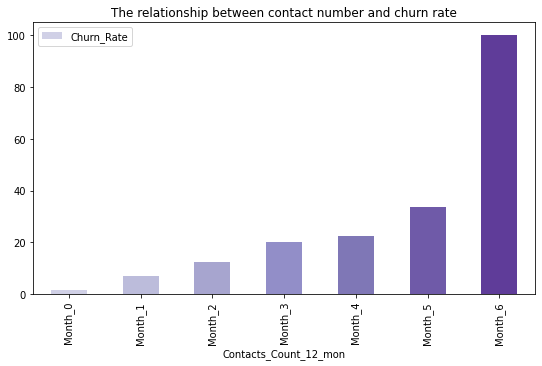

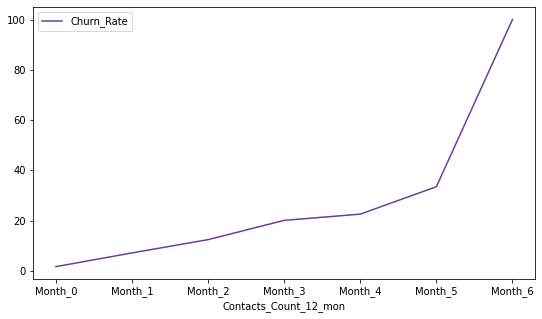

In [ ]:
ContactNum_impact.plot(title = 'The relationship between contact number and churn rate', kind='bar', 
                       x='Contacts_Count_12_mon', y='Churn_Rate', 
                       color = ['#d0d0e6','#bcbcdb','#a7a5cf','#928ec8','#7f77b6','#6f5aa8','#5f3c99'], figsize=(9, 5));
ContactNum_impact.plot(kind='line', x='Contacts_Count_12_mon', y='Churn_Rate', color = '#6a3d9a', figsize=(9, 5));

Create graphs to see the tendency. We can see there is a positive relationship between the number of contacts and churn rate.

In [ ]:
%%bigquery --project=ba775-team-project
SELECT ((SUM(Contacts_Count_12_mon * attrition_flag)-(SUM(Contacts_Count_12_mon) * SUM(attrition_flag)) / COUNT(*)))
  / (SQRT(SUM(Contacts_Count_12_mon * Contacts_Count_12_mon)-(SUM(Contacts_Count_12_mon) * SUM (Contacts_Count_12_mon)) / COUNT(*) ) * SQRT(SUM(attrition_flag * attrition_flag)
  -(SUM(attrition_flag) * SUM(attrition_flag)) / COUNT(*))) AS corr
from 
(
  select 
  Contacts_Count_12_mon,
  CAST(Attrition_Flag = 'Attrited Customer' AS INT) As attrition_flag
  from ba775-team-project.bankchurners.bankchurners
)

,corr
0,0.204491


The correlation coefficient of contacts and attrition flag shows that there is a positive relationship between the two rows.

### **Question 11: How does time length as being our customer affect churn rate?**

In [ ]:
%%bigquery Time_impact --project=ba775-team-project
SELECT
CASE
      WHEN Months_on_Book>=10 AND Months_on_Book <20 then '10-19'
      WHEN Months_on_Book>=20 AND Months_on_Book <30 then '20-29'
      WHEN Months_on_Book>=30 AND Months_on_Book <40 then '30-39'
      ELSE '>= 40'
    End as Months_on_Book,
SUM(CAST(Attrition_Flag = 'Attrited Customer'as int)) as Churn_Customer,
COUNT(*) as Total_Customer,
SUM(CAST(Attrition_Flag = 'Attrited Customer'as int))/count(*)*100 as Churn_Rate

FROM `ba775-team-project.bankchurners.bankchurners`
group by Months_on_Book
order by Months_on_Book

Divide the number of attrited customers by the total number of customers group by the Months_on_book to see whether the time length as being our customer will affect the churn rate.

In [ ]:
Time_impact

,Months_on_Book,Churn_Customer,Total_Customer,Churn_Rate
0,10-19,43,309,13.915858
1,20-29,238,1611,14.773433
2,30-39,899,5391,16.675941
3,>= 40,447,2816,15.873580


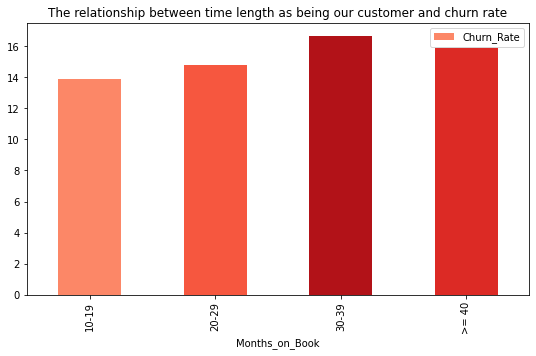

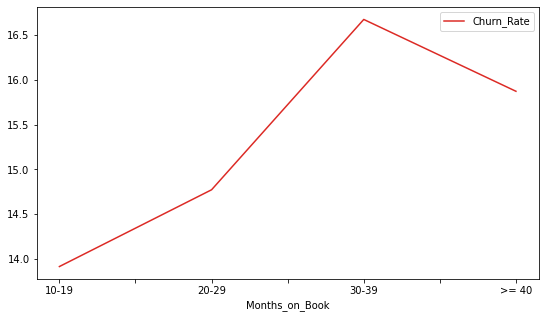

In [ ]:
Time_impact.plot(title = 'The relationship between time length as being our customer and churn rate', kind='bar', 
                 x='Months_on_Book', y='Churn_Rate', color = ['#fc8767', '#f6573f', '#b21218', '#dc2a25'],figsize=(9, 5));
Time_impact.plot(kind='line', x='Months_on_Book', y='Churn_Rate', color = '#dc2a25' ,figsize=(9, 5));

Create graphs to see the tendency. We can see the time lengh does affect the churn rate below 39 months, however, it seems to be less influential when it's longer 40 months.

In [ ]:
%%bigquery --project=ba775-team-project
SELECT ((SUM(months_on_book * attrition_flag)-(SUM(months_on_book) * SUM(attrition_flag)) / COUNT(*)))
  / (SQRT(SUM(months_on_book * months_on_book)-(SUM(months_on_book) * SUM (months_on_book)) / COUNT(*) ) * SQRT(SUM(attrition_flag * attrition_flag)
  -(SUM(attrition_flag) * SUM(attrition_flag)) / COUNT(*))) AS corr
from 
(
  select 
  months_on_book,
  CAST(Attrition_Flag = 'Attrited Customer' AS INT) As attrition_flag
  from ba775-team-project.bankchurners.bankchurners
)

,corr
0,0.013687


Below is the correlation between months on book and whether it is a churned customer. Similar to the results of the graphs, there is no significant correlation between the two rows. 

### **Question 12: How does the number of other existing service affect churn rate?**

In [3]:
%%bigquery Relation_Impact --project=ba775-team-project
SELECT 
  Total_Relationship_Count AS Total_Products, 
  sum(CAST(Attrition_Flag = 'Attrited Customer'as int)) as Churned_Accounts,
  count(*) as Total_Accounts, 
  sum(CAST(Attrition_Flag = 'Attrited Customer'as int))/count(*)*100 as Churn_Rate,
FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Total_Relationship_Count
ORDER BY Total_Relationship_Count;

As seen in the table below, customers in the 1-2 product category have the highest churn rates whereas churn rates are observed to be lower for customers with higher number of products.

In [4]:
Relation_Impact

,Total_Products,Churned_Accounts,Total_Accounts,Churn_Rate
0,1,233,910,25.604396
1,2,346,1243,27.835881
2,3,400,2305,17.353579
3,4,225,1912,11.767782
4,5,227,1891,12.004231
5,6,196,1866,10.503751


Correlation analysis between total number of products and churn rates: -0.015 which shows a negative but weak correlation between the two variables.

In [5]:
%%bigquery --project=ba775-team-project
SELECT ((SUM(Total_Relationship_Count * attrition_flag)
  -(SUM(Total_Relationship_Count) * SUM(attrition_flag)) / COUNT(*))) / (SQRT(SUM(Total_Relationship_Count * Total_Relationship_Count) 
  -(SUM(Total_Relationship_Count) * SUM (Total_Relationship_Count)) / COUNT(*) ) * SQRT(SUM(attrition_flag * attrition_flag)
  -(SUM(attrition_flag) * SUM(attrition_flag)) / COUNT(*))) AS corr
FROM
(SELECT 
  Total_Relationship_Count,
  CAST(Attrition_Flag = 'Attrited Customer' AS INT) As attrition_flag
  FROM ba775-team-project.bankchurners.bankchurners)

,corr
0,-0.150005


### **Question 13: How does transaction amount affect churn rate?**

In [ ]:
%%bigquery Total_Trans_Amt --project=ba-775-summer-21
/* transacation amount tendency */
SELECT sum(CAST(Attrition_Flag = 'Attrited Customer'as int)) as closed_account,count(*) as total_account,sum(CAST(Attrition_Flag = 'Attrited Customer'as int))/count(*)*100 as Churn_rate,
case
      WHEN Total_Trans_Amt <4000 then '0-4000'
      WHEN Total_Trans_Amt <8000 then '4000-8000'
      WHEN Total_Trans_Amt <12000 then '8000-12000'
      WHEN Total_Trans_Amt <16000 then '12000-16000'
      ELSE '16000-20000'
    End as Total_Trans_Amt
    
FROM `ba-775-summer-21.project1team1.bankchurners`
group by Total_Trans_Amt

Divide the number of attrited customers by the total number of customers group by the total transcation amount to see whether the amount our customer spend will affect the churn rate.

In [ ]:
Total_Trans_Amt

,closed_account,total_account,Churn_rate,Total_Trans_Amt
0,1318,5287,24.929071,0-4000
1,156,3751,4.158891,4000-8000
2,153,343,44.606414,8000-12000
3,0,657,0.000000,12000-16000
4,0,89,0.000000,16000-20000


Create graphs to see the tendency. We can see the customers with transacation amount below 4k tend to have a high churn rate. and customers with transcation amount between 8k to 12K have the highest churn rate. Moreover customers with transcation amount above 12k tend to stuck with us.

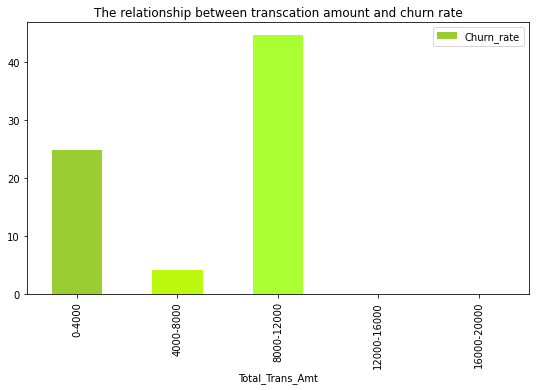

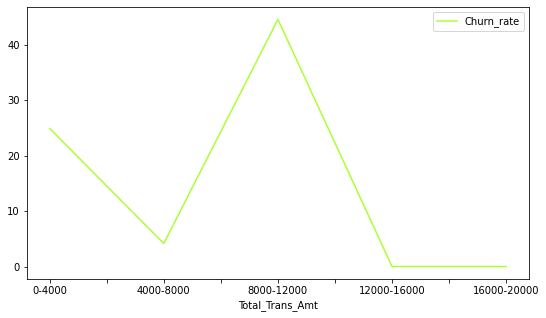

In [ ]:
Total_Trans_Amt.plot(title = 'The relationship between transcation amount and churn rate', kind='bar', 
                       x='Total_Trans_Amt', y='Churn_rate', 
                       color = ['#9acd32','#bbf90f','#aaff32','#ffff14','#ffff00'], figsize=(9, 5));
Total_Trans_Amt.plot(kind='line', x='Total_Trans_Amt', y='Churn_rate', color = '#aaff32', figsize=(9, 5));

### **Question 14: How does revolving balance affect churn rate?**

In [ ]:
%%bigquery Total_Revolving_Bal --project=ba-775-summer-21
/* revolving amount tendency */
SELECT sum(CAST(Attrition_Flag = 'Attrited Customer'as int)) as closed_account,count(*) as total_account,sum(CAST(Attrition_Flag = 'Attrited Customer'as int))/count(*)*100 as Churn_rate,
case
      WHEN Total_Revolving_Bal <500 then  '0-500'
      WHEN Total_Revolving_Bal <1000 then '0500-1000'
      WHEN Total_Revolving_Bal <1500 then '1000-1500'
      WHEN Total_Revolving_Bal <2000 then '1500-2000'
      ELSE '2000-2500'
    End as Total_Revolving_Bal
    
FROM `ba-775-summer-21.project1team1.bankchurners`
group by Total_Revolving_Bal
order by Total_Revolving_Bal

Divide the number of attrited customers by the total number of customers group by the total revolving balance to see whether the revolving balance will affect the churn rate.

In [ ]:
Total_Revolving_Bal

,closed_account,total_account,Churn_rate,Total_Revolving_Bal
0,998,2595,38.458574,0-500
1,163,1316,12.386018,0500-1000
2,103,2257,4.563580,1000-1500
3,108,2287,4.722344,1500-2000
4,255,1672,15.251196,2000-2500


Create graphs to see the tendency. We can see the revolving balance does affect the churn rate. customers with very low revolving balance tends to have a very high churn rate.

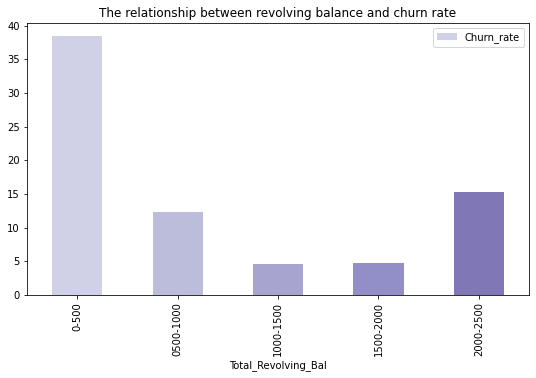

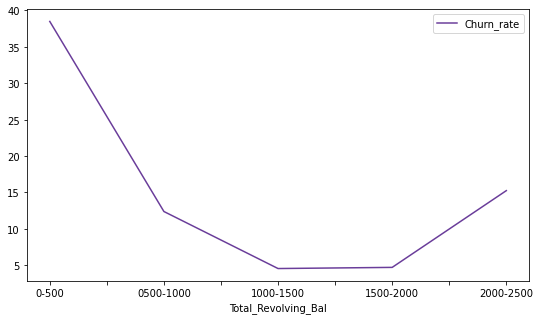

In [ ]:
Total_Revolving_Bal.plot(title = 'The relationship between revolving balance and churn rate', kind='bar', 
                       x='Total_Revolving_Bal', y='Churn_rate', 
                       color = ['#d0d0e6','#bcbcdb','#a7a5cf','#928ec8','#7f77b6'], figsize=(9, 5));
Total_Revolving_Bal.plot(kind='line', x='Total_Revolving_Bal', y='Churn_rate', color = '#6a3d9a', figsize=(9, 5));

# **Summary**